In [ ]:
# Imports
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import urllib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!unzip '/content/drive/MyDrive/SentimentAnalysisonMovieReviews.zip'
!unzip "/content/drive/MyDrive/Sentiment Analysis on Movie Reviews.zip"

Archive:  /content/drive/MyDrive/Sentiment Analysis on Movie Reviews.zip
  inflating: Sentiment Analysis on Movie Reviews/test.tsv  
  inflating: Sentiment Analysis on Movie Reviews/train.tsv  


In [ ]:
import pandas as pd
data = pd.read_csv("Sentiment Analysis on Movie Reviews/train.tsv", sep='\t')

In [ ]:
data.drop(["PhraseId", "SentenceId"], axis = 1, inplace = True)

In [ ]:
data

Phrase  Sentiment
0       A series of escapades demonstrating the adage ...          1
1       A series of escapades demonstrating the adage ...          2
2                                                A series          2
3                                                       A          2
4                                                  series          2
...                                                   ...        ...
156055                                          Hearst 's          2
156056                          forced avuncular chortles          1
156057                                 avuncular chortles          3
156058                                          avuncular          2
156059                                           chortles          2

[156060 rows x 2 columns]

In [ ]:
data['Sentiment'].value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

In [ ]:
data['Phrase'] = data['Phrase'].str.lower()

In [ ]:
input = data[["Phrase"]]
label = data[["Sentiment"]]

In [ ]:
input.to_csv(r"Inputs", index = None, header = None)
label.to_csv(r"Labels", index = None, header = None)

In [ ]:
# Load data (both inputs and labels) to string
data_path1 = "Inputs"
with open(data_path1, "r") as f:
    data_input = f.read()
data_path2 = "Labels"
with open(data_path2, "r") as f:
    data_labels = f.read()

In [ ]:
data_input

'"a series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story ."\na series of escapades demonstrating the adage that what is good for the goose\na series\na\nseries\nof escapades demonstrating the adage that what is good for the goose\nof\nescapades demonstrating the adage that what is good for the goose\nescapades\ndemonstrating the adage that what is good for the goose\ndemonstrating the adage\ndemonstrating\nthe adage\nthe\nadage\nthat what is good for the goose\nthat\nwhat is good for the goose\nwhat\nis good for the goose\nis\ngood for the goose\ngood\nfor the goose\nfor\nthe goose\ngoose\n"is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story ."\n"is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story"\nis also\nalso\n"good for the gander , some of

In [ ]:
data_labels 

'1\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n3\n3\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n1\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n3\n1\n2\n1\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n4\n3\n2\n4\n3\n2\n3\n3\n3\n2\n2\n4\n2\n3\n4\n2\n2\n2\n1\n2\n2\n2\n3\n2\n2\n2\n2\n2\n2\n2\n2\n1\n2\n2\n2\n2\n2\n1\n0\n2\n0\n2\n1\n1\n1\n2\n2\n1\n2\n2\n2\n2\n2\n3\n4\n4\n3\n3\n3\n3\n4\n2\n2\n2\n2\n2\n2\n2\n1\n2\n3\n2\n1\n2\n1\n1\n2\n1\n1\n2\n2\n2\n1\n2\n2\n1\n2\n3\n3\n3\n1\n2\n2\n1\n0\n2\n0\n1\n2\n1\n1\n2\n2\n4\n3\n2\n2\n3\n2\n4\n2\n3\n2\n4\n3\n3\n3\n4\n2\n4\n4\n3\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n1\n2\n2\n1\n2\n1\n0\n2\n1\n2\n2\n2\n1\n0\n1\n0\n1\n1\n3\n2\n3\n2\n3\n2\n2\n3\n3\n2\n2\n3\n2\n3\n2\n2\n2\n2\n2\n3\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n1\n1\n1\n1\n1\n2\n2\n2\n2\n1\n2\n2\n1\n1\n0\n2\n1\n0\n0\n2\n2\n2\n2\n2\n1\n2\n1\n1\n1\n1\n2\n2\n2\n4\n3\n2\n2\n2\n1\n2\n2\n2\n2\n1\n1\n1\n1\n1\n2\n2\n1\n2\n3\n2\n2\n3\n4\n3\n3\n1\n2\n2\n3\n2\n0\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n3\n2\n2\n2\n2\n2\n2\n

In [ ]:
import string
import re
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# we iterate each character of a string and leave it only if it's not a punctuation
list_characters = [c for c in data_input if c not in punctuation]

In [ ]:
data_input = "".join(list_characters)

In [ ]:
data_input = data_input.split("\n")

In [ ]:
data_input[-1]

''

In [ ]:
data_input = data_input[:-1]

In [ ]:
data_input = [[w for w in r.split(" ") if len(w)>0] for r in data_input]

In [ ]:
data_input

[['a',
  'series',
  'of',
  'escapades',
  'demonstrating',
  'the',
  'adage',
  'that',
  'what',
  'is',
  'good',
  'for',
  'the',
  'goose',
  'is',
  'also',
  'good',
  'for',
  'the',
  'gander',
  'some',
  'of',
  'which',
  'occasionally',
  'amuses',
  'but',
  'none',
  'of',
  'which',
  'amounts',
  'to',
  'much',
  'of',
  'a',
  'story'],
 ['a',
  'series',
  'of',
  'escapades',
  'demonstrating',
  'the',
  'adage',
  'that',
  'what',
  'is',
  'good',
  'for',
  'the',
  'goose'],
 ['a', 'series'],
 ['a'],
 ['series'],
 ['of',
  'escapades',
  'demonstrating',
  'the',
  'adage',
  'that',
  'what',
  'is',
  'good',
  'for',
  'the',
  'goose'],
 ['of'],
 ['escapades',
  'demonstrating',
  'the',
  'adage',
  'that',
  'what',
  'is',
  'good',
  'for',
  'the',
  'goose'],
 ['escapades'],
 ['demonstrating',
  'the',
  'adage',
  'that',
  'what',
  'is',
  'good',
  'for',
  'the',
  'goose'],
 ['demonstrating', 'the', 'adage'],
 ['demonstrating'],
 ['the', 'a

In [ ]:
data_input_lens = [len(r) for r in data_input]

In [ ]:
words = list(set([w for r in data_input for w in r])) 

In [ ]:
vocab = {words[i]: i+1 for i in range(len(words))}

In [ ]:
len(vocab)

16403

In [ ]:
vocab

{'permitting': 1,
 'land': 2,
 'ideology': 3,
 'javier': 4,
 'elicit': 5,
 'fence': 6,
 'style': 7,
 'freakshow': 8,
 'allnight': 9,
 'damsel': 10,
 'hang': 11,
 'dour': 12,
 'excellent': 13,
 'rigged': 14,
 'avoiding': 15,
 'cantet': 16,
 'provoke': 17,
 'painting': 18,
 'slowness': 19,
 'lungs': 20,
 'improvise': 21,
 'captain': 22,
 'turkey': 23,
 'limpid': 24,
 'lohman': 25,
 'immature': 26,
 'gratify': 27,
 'slasher': 28,
 'drying': 29,
 'ferret': 30,
 'delves': 31,
 'retaliatory': 32,
 'resonance': 33,
 'pot': 34,
 'skeleton': 35,
 'withered': 36,
 'done': 37,
 'evenings': 38,
 'simulate': 39,
 'magnolia': 40,
 'distillation': 41,
 'privileged': 42,
 'malone': 43,
 'passer': 44,
 'scratch': 45,
 'masterfully': 46,
 'brian': 47,
 'travis': 48,
 'borstal': 49,
 'pool': 50,
 'isolated': 51,
 'lick': 52,
 'cowrote': 53,
 'spiffy': 54,
 'lottery': 55,
 'film': 56,
 'datenight': 57,
 'milks': 58,
 'rudd': 59,
 'parties': 60,
 'windinthehair': 61,
 'mortal': 62,
 'assurance': 63,
 'wobb

In [ ]:
input_index = [[vocab[w] for w in r] for r in data_input]

In [ ]:
input_index[0]

[15149,
 11613,
 11140,
 10928,
 4569,
 4597,
 13138,
 12996,
 13970,
 639,
 8037,
 14279,
 4597,
 4602,
 639,
 7473,
 8037,
 14279,
 4597,
 3864,
 1039,
 11140,
 13505,
 7666,
 2393,
 2103,
 14719,
 11140,
 13505,
 9755,
 5531,
 11319,
 11140,
 15149,
 2565]

In [ ]:
# We compute the average sentence lenght
sentences_lens = [len(r) for r in input_index]
sum(sentences_lens) / len(sentences_lens)

6.714962194027938

In [ ]:
max(sentences_lens)

48

In [ ]:
seq_len = max(sentences_lens)  # number of words for each sentence 

In [ ]:
# PADDING
from keras.preprocessing.sequence import pad_sequences
input_pad = pad_sequences(input_index, maxlen= seq_len, padding='post')
input_pad

array([[15149, 11613, 11140, ...,     0,     0,     0],
       [15149, 11613, 11140, ...,     0,     0,     0],
       [15149, 11613,     0, ...,     0,     0,     0],
       ...,
       [13066, 11625,     0, ...,     0,     0,     0],
       [13066,     0,     0, ...,     0,     0,     0],
       [11625,     0,     0, ...,     0,     0,     0]], dtype=int32)

In [ ]:
#Convert to tensor
input_tensor = torch.LongTensor(input_pad)

In [ ]:
input_tensor

tensor([[15149, 11613, 11140,  ...,     0,     0,     0],
        [15149, 11613, 11140,  ...,     0,     0,     0],
        [15149, 11613,     0,  ...,     0,     0,     0],
        ...,
        [13066, 11625,     0,  ...,     0,     0,     0],
        [13066,     0,     0,  ...,     0,     0,     0],
        [11625,     0,     0,  ...,     0,     0,     0]])

In [ ]:
input_tensor.size()

torch.Size([156060, 48])

In [ ]:
#Labels:
data_labels

'1\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n3\n3\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n1\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n3\n1\n2\n1\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n4\n3\n2\n4\n3\n2\n3\n3\n3\n2\n2\n4\n2\n3\n4\n2\n2\n2\n1\n2\n2\n2\n3\n2\n2\n2\n2\n2\n2\n2\n2\n1\n2\n2\n2\n2\n2\n1\n0\n2\n0\n2\n1\n1\n1\n2\n2\n1\n2\n2\n2\n2\n2\n3\n4\n4\n3\n3\n3\n3\n4\n2\n2\n2\n2\n2\n2\n2\n1\n2\n3\n2\n1\n2\n1\n1\n2\n1\n1\n2\n2\n2\n1\n2\n2\n1\n2\n3\n3\n3\n1\n2\n2\n1\n0\n2\n0\n1\n2\n1\n1\n2\n2\n4\n3\n2\n2\n3\n2\n4\n2\n3\n2\n4\n3\n3\n3\n4\n2\n4\n4\n3\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n1\n2\n2\n1\n2\n1\n0\n2\n1\n2\n2\n2\n1\n0\n1\n0\n1\n1\n3\n2\n3\n2\n3\n2\n2\n3\n3\n2\n2\n3\n2\n3\n2\n2\n2\n2\n2\n3\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n1\n1\n1\n1\n1\n2\n2\n2\n2\n1\n2\n2\n1\n1\n0\n2\n1\n0\n0\n2\n2\n2\n2\n2\n1\n2\n1\n1\n1\n1\n2\n2\n2\n4\n3\n2\n2\n2\n1\n2\n2\n2\n2\n1\n1\n1\n1\n1\n2\n2\n1\n2\n3\n2\n2\n3\n4\n3\n3\n1\n2\n2\n3\n2\n0\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n2\n3\n2\n2\n2\n2\n2\n2\n

In [ ]:
data_labels = data_labels.split("\n")

In [ ]:
# discard the last elem of sentiments (empty string)
data_labels = data_labels[:-1]

In [ ]:
data_labels = [0 if data_labels[i]=='0' else 1 if data_labels[i]=='1' else 2 if data_labels[i]=='2' else 3 if data_labels[i]=='3' else 4 for i in range(len(data_labels))]

In [ ]:
labels_tensor = torch.LongTensor(data_labels)

In [ ]:
labels_tensor

tensor([1, 2, 2,  ..., 3, 2, 2])

In [ ]:
labels_tensor.size()

torch.Size([156060])

In [ ]:
#Defining datasets:
# some parameters
frac_train = 0.8 # fraction of data for train
frac_val = 0.1   # fraction of data for val
batch_size = 250

In [ ]:
# shuffle dataset
num_data = input_tensor.size(0)
shuffle_idx = torch.randperm(num_data)
data = input_tensor[shuffle_idx,:]
labels = labels_tensor[shuffle_idx]

In [ ]:
# split training, validation and test
torch.manual_seed(123)
num_train = int(num_data*frac_train)
num_val = int(num_data*frac_val)
num_test = num_data - num_train - num_val
train_data = data[:num_train,:]
train_labels = labels[:num_train]
val_data = data[num_train:num_train+num_val,:]
val_labels = labels[num_train:num_train+num_val]
test_data = data[num_train+num_val:,:]
test_labels = labels[num_train+num_val:]

In [ ]:
print(train_data.size())
print(val_data.size())
print(test_data.size())

torch.Size([124848, 48])
torch.Size([15606, 48])
torch.Size([15606, 48])


In [ ]:
# create datasets
train_dataset = TensorDataset(train_data, train_labels)
val_dataset = TensorDataset(val_data, val_labels)
test_dataset = TensorDataset(test_data, test_labels)

In [ ]:
# Create loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,  drop_last=True)
val_loader = DataLoader(val_dataset,   batch_size=batch_size, shuffle=False, drop_last=True)
test_loader = DataLoader(test_dataset,  batch_size=batch_size, shuffle=False, drop_last=True)

In [ ]:
# Define dictionary of loaders
loaders = {"train": train_loader,
           "val": val_loader,
           "test": test_loader}

# One layer

In [ ]:
#Defining RNN:
class Model1(nn.Module):
  def __init__(self, num_embed, embed_size, rnn_size, num_layers):
     # Call parent constructor
        super().__init__()
        # Store values
        self.rnn_size = rnn_size
       # Define modules
        self.embedding = nn.Embedding(len(vocab)+1, embed_size)#len+1 because we have the 0 as padding
        self.rnn = nn.LSTMCell(embed_size, rnn_size,num_layers) #LSTMCell represents only a single time step
        # LSTMCell, differently from RNNCell decides what to keep and what to remove, soo it performs better.
        self.output = nn.Linear(rnn_size, 5)
     
  def forward(self, x):
        # Embed data
        x = self.embedding(x)
        # Initialize state
        h = torch.zeros(x.shape[0], self.rnn_size).to(x.device.type) # the state of the cell
        c = torch.zeros(x.shape[0], self.rnn_size).to(x.device.type) # the output of the cell
      
        # Input is: B x T x F
        # Process each time step

        for t in range(x.shape[1]):
            # Input at time t
            x_t = x[:,t,:]
            # Forward RNN and get new state
            h,c = self.rnn(x_t, (h,c))
        # Classify final state
        x = self.output(h)
        return x

In [ ]:
# Setup device
dev = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Model parameters
embed_size = 400
rnn_size = 256
num_layers = 1

In [ ]:
# Create model
model1 = Model1(len(vocab)+1, embed_size, rnn_size, num_layers).to(dev)

In [ ]:
# Test model output
model1.eval()
test_input = train_dataset[0][0].unsqueeze(0).to(dev)
print("Model output size:", model1(test_input).size())

Model output size: torch.Size([1, 5])


In [ ]:
# Create optimizer
optimizer = torch.optim.Adam(model1.parameters(), lr=0.001, weight_decay=5e-4)

# Define a loss 
criterion = nn.CrossEntropyLoss()

In [ ]:
# Start training
from tqdm import tqdm
for epoch in range(20):
    # Initialize accumulators for computing average loss/accuracy
    epoch_loss_sum = {'train': 0, 'val': 0, 'test': 0}
    epoch_loss_cnt = {'train': 0, 'val': 0, 'test': 0}
    epoch_accuracy_sum = {'train': 0, 'val': 0, 'test': 0}
    epoch_accuracy_cnt = {'train': 0, 'val': 0, 'test': 0}
    # Process each split
    for split in ["train", "val", "test"]:
        # Set network mode
        if split == "train":
            model1.train()
            torch.set_grad_enabled(True)
        else:
            model1.eval()
            torch.set_grad_enabled(False)
        # Process all data in split
        for input, target in tqdm(loaders[split]):
            # Move to device
            input = input.to(dev)
            target = target.to(dev)
            # Reset gradients
            optimizer.zero_grad()
            # Forward
            output = model1(input)
            loss = criterion(output, target)
            # Update loss sum
            epoch_loss_sum[split] += loss.item()
            epoch_loss_cnt[split] += 1
            # Compute accuracy
            _,pred = output.max(1)
            correct = pred.eq(target).sum().item()
            accuracy = correct/input.size(0)
            # Update accuracy sum
            epoch_accuracy_sum[split] += accuracy
            epoch_accuracy_cnt[split] += 1
            # Backward and optimize
            if split == "train":
                loss.backward()
                optimizer.step()
    # Compute average epoch loss/accuracy
    avg_train_loss = epoch_loss_sum["train"]/epoch_loss_cnt["train"]
    avg_train_accuracy = epoch_accuracy_sum["train"]/epoch_accuracy_cnt["train"]
    avg_val_loss = epoch_loss_sum["val"]/epoch_loss_cnt["val"]
    avg_val_accuracy = epoch_accuracy_sum["val"]/epoch_accuracy_cnt["val"]
    avg_test_loss = epoch_loss_sum["test"]/epoch_loss_cnt["test"]
    avg_test_accuracy = epoch_accuracy_sum["test"]/epoch_accuracy_cnt["test"]
    print(f"Epoch: {epoch+1}, TrL={avg_train_loss:.4f}, TrA={avg_train_accuracy:.4f},",
                            f"VL={avg_val_loss:.4f}, VA={avg_val_accuracy:.4f}, ",
                            f"TeL={avg_test_loss:.4f}, TeA={avg_test_accuracy:.4f}")

100%|██████████| 62/62 [00:00<00:00, 136.11it/s]


Epoch: 1, TrL=1.2863, TrA=0.5089, VL=1.2857, VA=0.5103,  TeL=1.2951, TeA=0.5101


100%|██████████| 62/62 [00:00<00:00, 133.92it/s]


Epoch: 2, TrL=1.2661, TrA=0.5100, VL=1.2002, VA=0.5139,  TeL=1.2088, TeA=0.5162


100%|██████████| 62/62 [00:00<00:00, 133.95it/s]


Epoch: 3, TrL=1.1843, TrA=0.5201, VL=1.1663, VA=0.5321,  TeL=1.1756, TeA=0.5274


100%|██████████| 62/62 [00:00<00:00, 131.78it/s]


Epoch: 4, TrL=1.1510, TrA=0.5364, VL=1.1331, VA=0.5501,  TeL=1.1406, TeA=0.5453


100%|██████████| 62/62 [00:00<00:00, 130.57it/s]


Epoch: 5, TrL=1.0940, TrA=0.5644, VL=1.0356, VA=0.5868,  TeL=1.0345, TeA=0.5886


100%|██████████| 62/62 [00:00<00:00, 130.48it/s]


Epoch: 6, TrL=0.9588, TrA=0.6136, VL=0.9202, VA=0.6229,  TeL=0.9218, TeA=0.6221


100%|██████████| 62/62 [00:00<00:00, 130.28it/s]


Epoch: 7, TrL=0.8891, TrA=0.6362, VL=0.8756, VA=0.6399,  TeL=0.8698, TeA=0.6449


100%|██████████| 62/62 [00:00<00:00, 128.45it/s]


Epoch: 8, TrL=0.8584, TrA=0.6454, VL=0.8617, VA=0.6464,  TeL=0.8590, TeA=0.6486


100%|██████████| 62/62 [00:00<00:00, 130.21it/s]


Epoch: 9, TrL=0.8317, TrA=0.6546, VL=0.8429, VA=0.6527,  TeL=0.8407, TeA=0.6497


100%|██████████| 62/62 [00:00<00:00, 128.48it/s]


Epoch: 10, TrL=0.8134, TrA=0.6608, VL=0.8324, VA=0.6597,  TeL=0.8358, TeA=0.6556


100%|██████████| 62/62 [00:00<00:00, 128.63it/s]


Epoch: 11, TrL=0.7945, TrA=0.6683, VL=0.8233, VA=0.6590,  TeL=0.8234, TeA=0.6555


100%|██████████| 62/62 [00:00<00:00, 129.07it/s]


Epoch: 12, TrL=0.7795, TrA=0.6745, VL=0.8235, VA=0.6635,  TeL=0.8178, TeA=0.6634


100%|██████████| 62/62 [00:00<00:00, 130.36it/s]


Epoch: 13, TrL=0.7685, TrA=0.6782, VL=0.8152, VA=0.6637,  TeL=0.8185, TeA=0.6628


100%|██████████| 62/62 [00:00<00:00, 132.25it/s]


Epoch: 14, TrL=0.7567, TrA=0.6838, VL=0.8263, VA=0.6562,  TeL=0.8167, TeA=0.6612


100%|██████████| 62/62 [00:00<00:00, 129.16it/s]


Epoch: 15, TrL=0.7452, TrA=0.6870, VL=0.8196, VA=0.6607,  TeL=0.8187, TeA=0.6626


100%|██████████| 62/62 [00:00<00:00, 129.01it/s]


Epoch: 16, TrL=0.7351, TrA=0.6913, VL=0.8117, VA=0.6668,  TeL=0.8077, TeA=0.6693


100%|██████████| 62/62 [00:00<00:00, 130.44it/s]


Epoch: 17, TrL=0.7246, TrA=0.6968, VL=0.8122, VA=0.6649,  TeL=0.8106, TeA=0.6667


100%|██████████| 62/62 [00:00<00:00, 126.06it/s]


Epoch: 18, TrL=0.7148, TrA=0.7012, VL=0.8201, VA=0.6694,  TeL=0.8156, TeA=0.6673


100%|██████████| 62/62 [00:00<00:00, 130.64it/s]


Epoch: 19, TrL=0.7087, TrA=0.7029, VL=0.8207, VA=0.6623,  TeL=0.8180, TeA=0.6639


100%|██████████| 62/62 [00:00<00:00, 129.48it/s]

Epoch: 20, TrL=0.6998, TrA=0.7073, VL=0.8238, VA=0.6567,  TeL=0.8204, TeA=0.6530


# Two layers:

In [ ]:
# Define model with LSTM neural networks

class Model2(nn.Module):
    def __init__(self, num_embed, embed_size, rnn_size, num_layers):
       
        # Call parent constructor
        super().__init__()
        
        # Store values
        self.rnn_size = rnn_size
        
        # Define modules
        self.embedding = nn.Embedding(len(vocab)+1, embed_size)#len+1 because we have the 0 as padding
        self.rnn = nn.LSTMCell(embed_size, rnn_size, num_layers) #LSTMCell represents only a single time step

        # LSTMCell, differently from RNNCell decides what to keep and what to remove, soo it performs better.
        self.output = nn.Linear(rnn_size, 5)
 
    def forward(self, x):

        # Embed data
        x = self.embedding(x)

        # Initialize state

        h = torch.zeros(x.shape[0], self.rnn_size).to(x.device.type) # the state of the cell
        c = torch.zeros(x.shape[0], self.rnn_size).to(x.device.type) # the output of the cell
        
        # Input is: B x T x F
        # Process each time step
        for t in range(x.shape[1]):
          x_t = x[:,t,:]
          # Forward RNN and get new state
          h,c = self.rnn(x_t, (h,c))
          # Classify final state
        x = self.output(h)
        
        return x

In [ ]:
# Setup device
dev = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Model parameters
embed_size = 400
rnn_size = 256 #hidden_size
num_layers = 2

In [ ]:
# Create model
model2 = Model2(len(vocab)+1, embed_size, rnn_size, num_layers).to(dev)

In [ ]:
# Test model output
model2.eval()
test_input = train_dataset[0][0].unsqueeze(0).to(dev)
print("Model output size:", model2(test_input).size())

Model output size: torch.Size([1, 5])


In [ ]:
# Create optimizer
optimizer = torch.optim.Adam(model2.parameters(), lr=0.001, weight_decay=5e-4)
# Define a loss 
criterion = nn.CrossEntropyLoss()

In [ ]:
# Start training
from tqdm import tqdm
for epoch in range(20):
    # Initialize accumulators for computing average loss/accuracy
    epoch_loss_sum = {'train': 0, 'val': 0, 'test': 0}
    epoch_loss_cnt = {'train': 0, 'val': 0, 'test': 0}
    epoch_accuracy_sum = {'train': 0, 'val': 0, 'test': 0}
    epoch_accuracy_cnt = {'train': 0, 'val': 0, 'test': 0}
    # Process each split
    for split in ["train", "val", "test"]:
        # Set network mode
        if split == "train":
            model2.train()
            torch.set_grad_enabled(True)
        else:
            model2.eval()
            torch.set_grad_enabled(False)
        # Process all data in split
        for input, target in tqdm(loaders[split]):
            # Move to device
            input = input.to(dev)
            target = target.to(dev)
            # Reset gradients
            optimizer.zero_grad()
            # Forward
            output = model2(input)
            loss = criterion(output, target)
            # Update loss sum
            epoch_loss_sum[split] += loss.item()
            epoch_loss_cnt[split] += 1
            # Compute accuracy
            _,pred = output.max(1)
            correct = pred.eq(target).sum().item()
            accuracy = correct/input.size(0)
            # Update accuracy sum
            epoch_accuracy_sum[split] += accuracy
            epoch_accuracy_cnt[split] += 1
            # Backward and optimize
            if split == "train":
                loss.backward()
                optimizer.step()
    # Compute average epoch loss/accuracy
    avg_train_loss = epoch_loss_sum["train"]/epoch_loss_cnt["train"]
    avg_train_accuracy = epoch_accuracy_sum["train"]/epoch_accuracy_cnt["train"]
    avg_val_loss = epoch_loss_sum["val"]/epoch_loss_cnt["val"]
    avg_val_accuracy = epoch_accuracy_sum["val"]/epoch_accuracy_cnt["val"]
    avg_test_loss = epoch_loss_sum["test"]/epoch_loss_cnt["test"]
    avg_test_accuracy = epoch_accuracy_sum["test"]/epoch_accuracy_cnt["test"]
    print(f"Epoch: {epoch+1}, TrL={avg_train_loss:.4f}, TrA={avg_train_accuracy:.4f},",
                            f"VL={avg_val_loss:.4f}, VA={avg_val_accuracy:.4f}, ",
                            f"TeL={avg_test_loss:.4f}, TeA={avg_test_accuracy:.4f}")

100%|██████████| 62/62 [00:00<00:00, 134.29it/s]


Epoch: 1, TrL=1.2862, TrA=0.5091, VL=1.2837, VA=0.5103,  TeL=1.2924, TeA=0.5101


100%|██████████| 62/62 [00:00<00:00, 135.28it/s]


Epoch: 2, TrL=1.2842, TrA=0.5099, VL=1.2846, VA=0.5103,  TeL=1.2930, TeA=0.5101


100%|██████████| 62/62 [00:00<00:00, 131.80it/s]


Epoch: 3, TrL=1.2838, TrA=0.5099, VL=1.2837, VA=0.5103,  TeL=1.2925, TeA=0.5102


100%|██████████| 62/62 [00:00<00:00, 134.46it/s]


Epoch: 4, TrL=1.2437, TrA=0.5114, VL=1.1793, VA=0.5274,  TeL=1.1931, TeA=0.5209


100%|██████████| 62/62 [00:00<00:00, 133.39it/s]


Epoch: 5, TrL=1.1417, TrA=0.5389, VL=1.0962, VA=0.5630,  TeL=1.1039, TeA=0.5583


100%|██████████| 62/62 [00:00<00:00, 130.44it/s]


Epoch: 6, TrL=1.0358, TrA=0.5861, VL=0.9601, VA=0.6140,  TeL=0.9583, TeA=0.6122


100%|██████████| 62/62 [00:00<00:00, 129.45it/s]


Epoch: 7, TrL=0.9164, TrA=0.6276, VL=0.8873, VA=0.6388,  TeL=0.8907, TeA=0.6373


100%|██████████| 62/62 [00:00<00:00, 132.41it/s]


Epoch: 8, TrL=0.8710, TrA=0.6411, VL=0.8554, VA=0.6504,  TeL=0.8528, TeA=0.6467


100%|██████████| 62/62 [00:00<00:00, 130.37it/s]


Epoch: 9, TrL=0.8403, TrA=0.6508, VL=0.8468, VA=0.6498,  TeL=0.8500, TeA=0.6470


100%|██████████| 62/62 [00:00<00:00, 130.86it/s]


Epoch: 10, TrL=0.8184, TrA=0.6602, VL=0.8255, VA=0.6616,  TeL=0.8303, TeA=0.6530


100%|██████████| 62/62 [00:00<00:00, 129.90it/s]


Epoch: 11, TrL=0.7972, TrA=0.6660, VL=0.8235, VA=0.6592,  TeL=0.8246, TeA=0.6568


100%|██████████| 62/62 [00:00<00:00, 130.88it/s]


Epoch: 12, TrL=0.7802, TrA=0.6718, VL=0.8207, VA=0.6633,  TeL=0.8206, TeA=0.6603


100%|██████████| 62/62 [00:00<00:00, 129.92it/s]


Epoch: 13, TrL=0.7640, TrA=0.6791, VL=0.8209, VA=0.6645,  TeL=0.8190, TeA=0.6663


100%|██████████| 62/62 [00:00<00:00, 130.51it/s]


Epoch: 14, TrL=0.7503, TrA=0.6840, VL=0.8130, VA=0.6606,  TeL=0.8171, TeA=0.6557


100%|██████████| 62/62 [00:00<00:00, 130.34it/s]


Epoch: 15, TrL=0.7406, TrA=0.6879, VL=0.8119, VA=0.6685,  TeL=0.8162, TeA=0.6721


100%|██████████| 62/62 [00:00<00:00, 132.06it/s]


Epoch: 16, TrL=0.7290, TrA=0.6934, VL=0.8118, VA=0.6619,  TeL=0.8086, TeA=0.6672


100%|██████████| 62/62 [00:00<00:00, 128.89it/s]


Epoch: 17, TrL=0.7190, TrA=0.6973, VL=0.8196, VA=0.6585,  TeL=0.8185, TeA=0.6617


100%|██████████| 62/62 [00:00<00:00, 129.48it/s]


Epoch: 18, TrL=0.7116, TrA=0.7008, VL=0.8066, VA=0.6678,  TeL=0.8075, TeA=0.6668


100%|██████████| 62/62 [00:00<00:00, 129.76it/s]


Epoch: 19, TrL=0.7040, TrA=0.7036, VL=0.8350, VA=0.6585,  TeL=0.8358, TeA=0.6603


100%|██████████| 62/62 [00:00<00:00, 126.27it/s]

Epoch: 20, TrL=0.7002, TrA=0.7056, VL=0.8191, VA=0.6668,  TeL=0.8191, TeA=0.6660


# Three layers:

In [ ]:
# Define model with LSTM neural networks

class Model3(nn.Module):
    def __init__(self, num_embed, embed_size, rnn_size, num_layers):
       
        # Call parent constructor
        super().__init__()
        
        # Store values
        self.rnn_size = rnn_size
        
        # Define modules
        self.embedding = nn.Embedding(len(vocab)+1, embed_size)#len+1 because we have the 0 as padding
        self.rnn = nn.LSTMCell(embed_size, rnn_size, num_layers) #LSTMCell represents only a single time step

        # LSTMCell, differently from RNNCell decides what to keep and what to remove, soo it performs better.
        self.output = nn.Linear(rnn_size, 5)
 
    def forward(self, x):

        # Embed data
        x = self.embedding(x)

        # Initialize state

        h = torch.zeros(x.shape[0], self.rnn_size).to(x.device.type) # the state of the cell
        c = torch.zeros(x.shape[0], self.rnn_size).to(x.device.type) # the output of the cell
        
        # Input is: B x T x F
        # Process each time step
        for t in range(x.shape[1]):
          x_t = x[:,t,:]
          # Forward RNN and get new state
          h,c = self.rnn(x_t, (h,c))
          # Classify final state
        x = self.output(h)
        
        return x

In [ ]:
# Setup device
dev = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Model parameters
embed_size = 400
rnn_size = 256 #hidden_size
num_layers = 3

In [ ]:
# Create model
model3 = Model3(len(vocab)+1, embed_size, rnn_size, num_layers).to(dev)

In [ ]:
# Test model output
model3.eval()
test_input = train_dataset[0][0].unsqueeze(0).to(dev)
print("Model output size:", model3(test_input).size())

Model output size: torch.Size([1, 5])


In [ ]:
# Create optimizer
optimizer = torch.optim.Adam(model3.parameters(), lr=0.001, weight_decay=5e-4)
# Define a loss 
criterion = nn.CrossEntropyLoss()

In [ ]:
# Start training
from tqdm import tqdm
for epoch in range(20):
    # Initialize accumulators for computing average loss/accuracy
    epoch_loss_sum = {'train': 0, 'val': 0, 'test': 0}
    epoch_loss_cnt = {'train': 0, 'val': 0, 'test': 0}
    epoch_accuracy_sum = {'train': 0, 'val': 0, 'test': 0}
    epoch_accuracy_cnt = {'train': 0, 'val': 0, 'test': 0}
    # Process each split
    for split in ["train", "val", "test"]:
        # Set network mode
        if split == "train":
            model3.train()
            torch.set_grad_enabled(True)
        else:
            model3.eval()
            torch.set_grad_enabled(False)
        # Process all data in split
        for input, target in tqdm(loaders[split]):
            # Move to device
            input = input.to(dev)
            target = target.to(dev)
            # Reset gradients
            optimizer.zero_grad()
            # Forward
            output = model3(input)
            loss = criterion(output, target)
            # Update loss sum
            epoch_loss_sum[split] += loss.item()
            epoch_loss_cnt[split] += 1
            # Compute accuracy
            _,pred = output.max(1)
            correct = pred.eq(target).sum().item()
            accuracy = correct/input.size(0)
            # Update accuracy sum
            epoch_accuracy_sum[split] += accuracy
            epoch_accuracy_cnt[split] += 1
            # Backward and optimize
            if split == "train":
                loss.backward()
                optimizer.step()
    # Compute average epoch loss/accuracy
    avg_train_loss = epoch_loss_sum["train"]/epoch_loss_cnt["train"]
    avg_train_accuracy = epoch_accuracy_sum["train"]/epoch_accuracy_cnt["train"]
    avg_val_loss = epoch_loss_sum["val"]/epoch_loss_cnt["val"]
    avg_val_accuracy = epoch_accuracy_sum["val"]/epoch_accuracy_cnt["val"]
    avg_test_loss = epoch_loss_sum["test"]/epoch_loss_cnt["test"]
    avg_test_accuracy = epoch_accuracy_sum["test"]/epoch_accuracy_cnt["test"]
    print(f"Epoch: {epoch+1}, TrL={avg_train_loss:.4f}, TrA={avg_train_accuracy:.4f},",
                            f"VL={avg_val_loss:.4f}, VA={avg_val_accuracy:.4f}, ",
                            f"TeL={avg_test_loss:.4f}, TeA={avg_test_accuracy:.4f}")

100%|██████████| 62/62 [00:00<00:00, 135.67it/s]


Epoch: 1, TrL=1.2859, TrA=0.5091, VL=1.2854, VA=0.5103,  TeL=1.2947, TeA=0.5101


100%|██████████| 62/62 [00:00<00:00, 135.63it/s]


Epoch: 2, TrL=1.2845, TrA=0.5098, VL=1.2845, VA=0.5103,  TeL=1.2935, TeA=0.5101


100%|██████████| 62/62 [00:00<00:00, 130.65it/s]


Epoch: 3, TrL=1.2836, TrA=0.5098, VL=1.2742, VA=0.5103,  TeL=1.2829, TeA=0.5101


100%|██████████| 62/62 [00:00<00:00, 130.97it/s]


Epoch: 4, TrL=1.1926, TrA=0.5208, VL=1.1547, VA=0.5375,  TeL=1.1668, TeA=0.5298


100%|██████████| 62/62 [00:00<00:00, 131.67it/s]


Epoch: 5, TrL=1.1226, TrA=0.5506, VL=1.0819, VA=0.5717,  TeL=1.0909, TeA=0.5693


100%|██████████| 62/62 [00:00<00:00, 130.92it/s]


Epoch: 6, TrL=1.0460, TrA=0.5801, VL=0.9909, VA=0.6057,  TeL=0.9949, TeA=0.6012


100%|██████████| 62/62 [00:00<00:00, 130.75it/s]


Epoch: 7, TrL=0.9243, TrA=0.6244, VL=0.8867, VA=0.6389,  TeL=0.8999, TeA=0.6323


100%|██████████| 62/62 [00:00<00:00, 128.50it/s]


Epoch: 8, TrL=0.8705, TrA=0.6425, VL=0.8640, VA=0.6446,  TeL=0.8598, TeA=0.6452


100%|██████████| 62/62 [00:00<00:00, 128.13it/s]


Epoch: 9, TrL=0.8411, TrA=0.6512, VL=0.8416, VA=0.6495,  TeL=0.8424, TeA=0.6503


100%|██████████| 62/62 [00:00<00:00, 131.07it/s]


Epoch: 10, TrL=0.8157, TrA=0.6597, VL=0.8260, VA=0.6598,  TeL=0.8216, TeA=0.6614


100%|██████████| 62/62 [00:00<00:00, 128.52it/s]


Epoch: 11, TrL=0.7947, TrA=0.6676, VL=0.8218, VA=0.6624,  TeL=0.8205, TeA=0.6590


100%|██████████| 62/62 [00:00<00:00, 131.74it/s]


Epoch: 12, TrL=0.7780, TrA=0.6745, VL=0.8172, VA=0.6613,  TeL=0.8182, TeA=0.6620


100%|██████████| 62/62 [00:00<00:00, 129.60it/s]


Epoch: 13, TrL=0.7643, TrA=0.6804, VL=0.8170, VA=0.6635,  TeL=0.8143, TeA=0.6663


100%|██████████| 62/62 [00:00<00:00, 129.18it/s]


Epoch: 14, TrL=0.7517, TrA=0.6843, VL=0.8113, VA=0.6698,  TeL=0.8070, TeA=0.6670


100%|██████████| 62/62 [00:00<00:00, 131.91it/s]


Epoch: 15, TrL=0.7399, TrA=0.6896, VL=0.8126, VA=0.6611,  TeL=0.8127, TeA=0.6665


100%|██████████| 62/62 [00:00<00:00, 130.69it/s]


Epoch: 16, TrL=0.7315, TrA=0.6924, VL=0.8095, VA=0.6666,  TeL=0.8037, TeA=0.6689


100%|██████████| 62/62 [00:00<00:00, 128.05it/s]


Epoch: 17, TrL=0.7207, TrA=0.6967, VL=0.8150, VA=0.6639,  TeL=0.8174, TeA=0.6615


100%|██████████| 62/62 [00:00<00:00, 128.59it/s]


Epoch: 18, TrL=0.7134, TrA=0.6990, VL=0.8128, VA=0.6610,  TeL=0.8141, TeA=0.6580


100%|██████████| 62/62 [00:00<00:00, 129.07it/s]


Epoch: 19, TrL=0.7057, TrA=0.7021, VL=0.8119, VA=0.6661,  TeL=0.8100, TeA=0.6697


100%|██████████| 62/62 [00:00<00:00, 128.88it/s]

Epoch: 20, TrL=0.6998, TrA=0.7059, VL=0.8136, VA=0.6673,  TeL=0.8147, TeA=0.6660


# Four layers

In [ ]:
# Define model with LSTM neural networks

class Model4(nn.Module):
    def __init__(self, num_embed, embed_size, rnn_size, num_layers):
       
        # Call parent constructor
        super().__init__()
        
        # Store values
        self.rnn_size = rnn_size
        
        # Define modules
        self.embedding = nn.Embedding(len(vocab)+1, embed_size)#len+1 because we have the 0 as padding
        self.rnn = nn.LSTMCell(embed_size, rnn_size, num_layers) #LSTMCell represents only a single time step

        # LSTMCell, differently from RNNCell decides what to keep and what to remove, soo it performs better.
        self.output = nn.Linear(rnn_size, 5)
 
    def forward(self, x):

        # Embed data
        x = self.embedding(x)

        # Initialize state

        h = torch.zeros(x.shape[0], self.rnn_size).to(x.device.type) # the state of the cell
        c = torch.zeros(x.shape[0], self.rnn_size).to(x.device.type) # the output of the cell
        
        # Input is: B x T x F
        # Process each time step
        for t in range(x.shape[1]):
          x_t = x[:,t,:]
          # Forward RNN and get new state
          h,c = self.rnn(x_t, (h,c))
          # Classify final state
        x = self.output(h)
        
        return x

In [ ]:
# Setup device
dev = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Model parameters
embed_size = 400
rnn_size = 256 #hidden_size
num_layers = 4

In [ ]:
# Create model
model4 = Model4(len(vocab)+1, embed_size, rnn_size, num_layers).to(dev)

In [ ]:
# Test model output
model4.eval()
test_input = train_dataset[0][0].unsqueeze(0).to(dev)
print("Model output size:", model4(test_input).size())

Model output size: torch.Size([1, 5])


In [ ]:
# Create optimizer
optimizer = torch.optim.Adam(model4.parameters(), lr=0.001, weight_decay=5e-4)
# Define a loss 
criterion = nn.CrossEntropyLoss()

In [ ]:
# Start training
from tqdm import tqdm
for epoch in range(20):
    # Initialize accumulators for computing average loss/accuracy
    epoch_loss_sum = {'train': 0, 'val': 0, 'test': 0}
    epoch_loss_cnt = {'train': 0, 'val': 0, 'test': 0}
    epoch_accuracy_sum = {'train': 0, 'val': 0, 'test': 0}
    epoch_accuracy_cnt = {'train': 0, 'val': 0, 'test': 0}
    # Process each split
    for split in ["train", "val", "test"]:
        # Set network mode
        if split == "train":
            model4.train()
            torch.set_grad_enabled(True)
        else:
            model4.eval()
            torch.set_grad_enabled(False)
        # Process all data in split
        for input, target in tqdm(loaders[split]):
            # Move to device
            input = input.to(dev)
            target = target.to(dev)
            # Reset gradients
            optimizer.zero_grad()
            # Forward
            output = model4(input)
            loss = criterion(output, target)
            # Update loss sum
            epoch_loss_sum[split] += loss.item()
            epoch_loss_cnt[split] += 1
            # Compute accuracy
            _,pred = output.max(1)
            correct = pred.eq(target).sum().item()
            accuracy = correct/input.size(0)
            # Update accuracy sum
            epoch_accuracy_sum[split] += accuracy
            epoch_accuracy_cnt[split] += 1
            # Backward and optimize
            if split == "train":
                loss.backward()
                optimizer.step()
    # Compute average epoch loss/accuracy
    avg_train_loss = epoch_loss_sum["train"]/epoch_loss_cnt["train"]
    avg_train_accuracy = epoch_accuracy_sum["train"]/epoch_accuracy_cnt["train"]
    avg_val_loss = epoch_loss_sum["val"]/epoch_loss_cnt["val"]
    avg_val_accuracy = epoch_accuracy_sum["val"]/epoch_accuracy_cnt["val"]
    avg_test_loss = epoch_loss_sum["test"]/epoch_loss_cnt["test"]
    avg_test_accuracy = epoch_accuracy_sum["test"]/epoch_accuracy_cnt["test"]
    print(f"Epoch: {epoch+1}, TrL={avg_train_loss:.4f}, TrA={avg_train_accuracy:.4f},",
                            f"VL={avg_val_loss:.4f}, VA={avg_val_accuracy:.4f}, ",
                            f"TeL={avg_test_loss:.4f}, TeA={avg_test_accuracy:.4f}")

100%|██████████| 62/62 [00:00<00:00, 132.96it/s]


Epoch: 1, TrL=1.2856, TrA=0.5102, VL=1.2975, VA=0.5079,  TeL=1.2939, TeA=0.5045


100%|██████████| 62/62 [00:00<00:00, 131.81it/s]


Epoch: 2, TrL=1.2836, TrA=0.5108, VL=1.2933, VA=0.5080,  TeL=1.2897, TeA=0.5045


100%|██████████| 62/62 [00:00<00:00, 133.67it/s]


Epoch: 3, TrL=1.2835, TrA=0.5108, VL=1.2920, VA=0.5080,  TeL=1.2879, TeA=0.5045


100%|██████████| 62/62 [00:00<00:00, 132.59it/s]


Epoch: 4, TrL=1.2832, TrA=0.5108, VL=1.2934, VA=0.5080,  TeL=1.2889, TeA=0.5045


100%|██████████| 62/62 [00:00<00:00, 130.92it/s]


Epoch: 5, TrL=1.2263, TrA=0.5167, VL=1.1583, VA=0.5300,  TeL=1.1503, TeA=0.5338


100%|██████████| 62/62 [00:00<00:00, 131.85it/s]


Epoch: 6, TrL=1.1151, TrA=0.5532, VL=1.1042, VA=0.5596,  TeL=1.0997, TeA=0.5606


100%|██████████| 62/62 [00:00<00:00, 133.59it/s]


Epoch: 7, TrL=1.0404, TrA=0.5791, VL=1.0248, VA=0.5855,  TeL=1.0154, TeA=0.5843


100%|██████████| 62/62 [00:00<00:00, 132.05it/s]


Epoch: 8, TrL=0.9853, TrA=0.6003, VL=0.9653, VA=0.6101,  TeL=0.9637, TeA=0.6204


100%|██████████| 62/62 [00:00<00:00, 90.79it/s] 


Epoch: 9, TrL=0.8942, TrA=0.6361, VL=0.8819, VA=0.6399,  TeL=0.8770, TeA=0.6457


100%|██████████| 62/62 [00:00<00:00, 132.85it/s]


Epoch: 10, TrL=0.8422, TrA=0.6521, VL=0.8585, VA=0.6457,  TeL=0.8514, TeA=0.6485


100%|██████████| 62/62 [00:00<00:00, 133.79it/s]


Epoch: 11, TrL=0.8086, TrA=0.6639, VL=0.8511, VA=0.6485,  TeL=0.8428, TeA=0.6472


100%|██████████| 62/62 [00:00<00:00, 133.54it/s]


Epoch: 12, TrL=0.7840, TrA=0.6744, VL=0.8315, VA=0.6559,  TeL=0.8295, TeA=0.6550


100%|██████████| 62/62 [00:00<00:00, 132.16it/s]


Epoch: 13, TrL=0.7639, TrA=0.6775, VL=0.8194, VA=0.6606,  TeL=0.8135, TeA=0.6649


100%|██████████| 62/62 [00:00<00:00, 131.45it/s]


Epoch: 14, TrL=0.7479, TrA=0.6844, VL=0.8194, VA=0.6639,  TeL=0.8109, TeA=0.6617


100%|██████████| 62/62 [00:00<00:00, 131.45it/s]


Epoch: 15, TrL=0.7343, TrA=0.6902, VL=0.8238, VA=0.6668,  TeL=0.8142, TeA=0.6645


100%|██████████| 62/62 [00:00<00:00, 133.48it/s]


Epoch: 16, TrL=0.7228, TrA=0.6943, VL=0.8303, VA=0.6666,  TeL=0.8238, TeA=0.6612


100%|██████████| 62/62 [00:00<00:00, 130.84it/s]


Epoch: 17, TrL=0.7133, TrA=0.6978, VL=0.8248, VA=0.6630,  TeL=0.8219, TeA=0.6643


100%|██████████| 62/62 [00:00<00:00, 131.13it/s]


Epoch: 18, TrL=0.7071, TrA=0.7003, VL=0.8163, VA=0.6611,  TeL=0.8099, TeA=0.6641


100%|██████████| 62/62 [00:00<00:00, 130.81it/s]


Epoch: 19, TrL=0.6983, TrA=0.7039, VL=0.8251, VA=0.6526,  TeL=0.8209, TeA=0.6553


100%|██████████| 62/62 [00:00<00:00, 130.93it/s]

Epoch: 20, TrL=0.6913, TrA=0.7074, VL=0.8296, VA=0.6536,  TeL=0.8253, TeA=0.6554


# Five layers




In [ ]:
# Define model with LSTM neural networks

class Model5(nn.Module):
    def __init__(self, num_embed, embed_size, rnn_size, num_layers):
       
        # Call parent constructor
        super().__init__()
        
        # Store values
        self.rnn_size = rnn_size
        
        # Define modules
        self.embedding = nn.Embedding(len(vocab)+1, embed_size)#len+1 because we have the 0 as padding
        self.rnn = nn.LSTMCell(embed_size, rnn_size, num_layers) #LSTMCell represents only a single time step

        # LSTMCell, differently from RNNCell decides what to keep and what to remove, soo it performs better.
        self.output = nn.Linear(rnn_size, 5)
 
    def forward(self, x):

        # Embed data
        x = self.embedding(x)

        # Initialize state

        h = torch.zeros(x.shape[0], self.rnn_size).to(x.device.type) # the state of the cell
        c = torch.zeros(x.shape[0], self.rnn_size).to(x.device.type) # the output of the cell
        
        # Input is: B x T x F
        # Process each time step
        for t in range(x.shape[1]):
          x_t = x[:,t,:]
          # Forward RNN and get new state
          h,c = self.rnn(x_t, (h,c))
          # Classify final state
        x = self.output(h)
        
        return x

In [ ]:
# Setup device
dev = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Model parameters
embed_size = 400
rnn_size = 256 #hidden_size
num_layers = 5

In [ ]:
# Create model
model5 = Model5(len(vocab)+1, embed_size, rnn_size, num_layers).to(dev)

In [ ]:
# Test model output
model5.eval()
test_input = train_dataset[0][0].unsqueeze(0).to(dev)
print("Model output size:", model5(test_input).size())

Model output size: torch.Size([1, 5])


In [ ]:
# Create optimizer
optimizer = torch.optim.Adam(model5.parameters(), lr=0.001, weight_decay=5e-4)
# Define a loss 
criterion = nn.CrossEntropyLoss()

In [ ]:
# Start training
from tqdm import tqdm
for epoch in range(20):
    # Initialize accumulators for computing average loss/accuracy
    epoch_loss_sum = {'train': 0, 'val': 0, 'test': 0}
    epoch_loss_cnt = {'train': 0, 'val': 0, 'test': 0}
    epoch_accuracy_sum = {'train': 0, 'val': 0, 'test': 0}
    epoch_accuracy_cnt = {'train': 0, 'val': 0, 'test': 0}
    # Process each split
    for split in ["train", "val", "test"]:
        # Set network mode
        if split == "train":
            model5.train()
            torch.set_grad_enabled(True)
        else:
            model5.eval()
            torch.set_grad_enabled(False)
        # Process all data in split
        for input, target in tqdm(loaders[split]):
            # Move to device
            input = input.to(dev)
            target = target.to(dev)
            # Reset gradients
            optimizer.zero_grad()
            # Forward
            output = model5(input)
            loss = criterion(output, target)
            # Update loss sum
            epoch_loss_sum[split] += loss.item()
            epoch_loss_cnt[split] += 1
            # Compute accuracy
            _,pred = output.max(1)
            correct = pred.eq(target).sum().item()
            accuracy = correct/input.size(0)
            # Update accuracy sum
            epoch_accuracy_sum[split] += accuracy
            epoch_accuracy_cnt[split] += 1
            # Backward and optimize
            if split == "train":
                loss.backward()
                optimizer.step()
    # Compute average epoch loss/accuracy
    avg_train_loss = epoch_loss_sum["train"]/epoch_loss_cnt["train"]
    avg_train_accuracy = epoch_accuracy_sum["train"]/epoch_accuracy_cnt["train"]
    avg_val_loss = epoch_loss_sum["val"]/epoch_loss_cnt["val"]
    avg_val_accuracy = epoch_accuracy_sum["val"]/epoch_accuracy_cnt["val"]
    avg_test_loss = epoch_loss_sum["test"]/epoch_loss_cnt["test"]
    avg_test_accuracy = epoch_accuracy_sum["test"]/epoch_accuracy_cnt["test"]
    print(f"Epoch: {epoch+1}, TrL={avg_train_loss:.4f}, TrA={avg_train_accuracy:.4f},",
                            f"VL={avg_val_loss:.4f}, VA={avg_val_accuracy:.4f}, ",
                            f"TeL={avg_test_loss:.4f}, TeA={avg_test_accuracy:.4f}")

100%|██████████| 62/62 [00:00<00:00, 131.46it/s]


Epoch: 1, TrL=1.2855, TrA=0.5108, VL=1.2945, VA=0.5079,  TeL=1.2893, TeA=0.5045


100%|██████████| 62/62 [00:00<00:00, 132.43it/s]


Epoch: 2, TrL=1.2835, TrA=0.5109, VL=1.2923, VA=0.5079,  TeL=1.2881, TeA=0.5045


100%|██████████| 62/62 [00:00<00:00, 132.64it/s]


Epoch: 3, TrL=1.2836, TrA=0.5108, VL=1.2923, VA=0.5079,  TeL=1.2891, TeA=0.5045


100%|██████████| 62/62 [00:00<00:00, 132.72it/s]


Epoch: 4, TrL=1.2239, TrA=0.5168, VL=1.1673, VA=0.5257,  TeL=1.1646, TeA=0.5245


100%|██████████| 62/62 [00:00<00:00, 131.72it/s]


Epoch: 5, TrL=1.1306, TrA=0.5462, VL=1.0978, VA=0.5613,  TeL=1.0922, TeA=0.5597


100%|██████████| 62/62 [00:00<00:00, 133.44it/s]


Epoch: 6, TrL=1.0623, TrA=0.5743, VL=1.0516, VA=0.5801,  TeL=1.0473, TeA=0.5811


100%|██████████| 62/62 [00:00<00:00, 131.52it/s]


Epoch: 7, TrL=0.9750, TrA=0.6092, VL=0.9381, VA=0.6229,  TeL=0.9325, TeA=0.6292


100%|██████████| 62/62 [00:00<00:00, 132.01it/s]


Epoch: 8, TrL=0.8875, TrA=0.6368, VL=0.8805, VA=0.6421,  TeL=0.8804, TeA=0.6397


100%|██████████| 62/62 [00:00<00:00, 132.07it/s]


Epoch: 9, TrL=0.8464, TrA=0.6497, VL=0.8830, VA=0.6352,  TeL=0.8769, TeA=0.6337


100%|██████████| 62/62 [00:00<00:00, 131.45it/s]


Epoch: 10, TrL=0.8166, TrA=0.6601, VL=0.8556, VA=0.6496,  TeL=0.8437, TeA=0.6544


100%|██████████| 62/62 [00:00<00:00, 130.84it/s]


Epoch: 11, TrL=0.7968, TrA=0.6665, VL=0.8345, VA=0.6627,  TeL=0.8313, TeA=0.6524


100%|██████████| 62/62 [00:00<00:00, 130.62it/s]


Epoch: 12, TrL=0.7770, TrA=0.6758, VL=0.8332, VA=0.6574,  TeL=0.8224, TeA=0.6588


100%|██████████| 62/62 [00:00<00:00, 132.75it/s]


Epoch: 13, TrL=0.7615, TrA=0.6790, VL=0.8366, VA=0.6606,  TeL=0.8267, TeA=0.6608


100%|██████████| 62/62 [00:00<00:00, 133.36it/s]


Epoch: 14, TrL=0.7475, TrA=0.6857, VL=0.8322, VA=0.6506,  TeL=0.8177, TeA=0.6586


100%|██████████| 62/62 [00:00<00:00, 133.55it/s]


Epoch: 15, TrL=0.7377, TrA=0.6898, VL=0.8303, VA=0.6619,  TeL=0.8158, TeA=0.6632


100%|██████████| 62/62 [00:00<00:00, 130.59it/s]


Epoch: 16, TrL=0.7291, TrA=0.6916, VL=0.8338, VA=0.6611,  TeL=0.8267, TeA=0.6581


100%|██████████| 62/62 [00:00<00:00, 132.04it/s]


Epoch: 17, TrL=0.7186, TrA=0.6965, VL=0.8230, VA=0.6606,  TeL=0.8157, TeA=0.6621


100%|██████████| 62/62 [00:00<00:00, 131.99it/s]


Epoch: 18, TrL=0.7108, TrA=0.6991, VL=0.8429, VA=0.6537,  TeL=0.8305, TeA=0.6597


100%|██████████| 62/62 [00:00<00:00, 132.08it/s]


Epoch: 19, TrL=0.7040, TrA=0.7020, VL=0.8312, VA=0.6578,  TeL=0.8238, TeA=0.6570


100%|██████████| 62/62 [00:00<00:00, 119.99it/s]

Epoch: 20, TrL=0.6990, TrA=0.7036, VL=0.8239, VA=0.6610,  TeL=0.8152, TeA=0.6623


## Confusion matrix

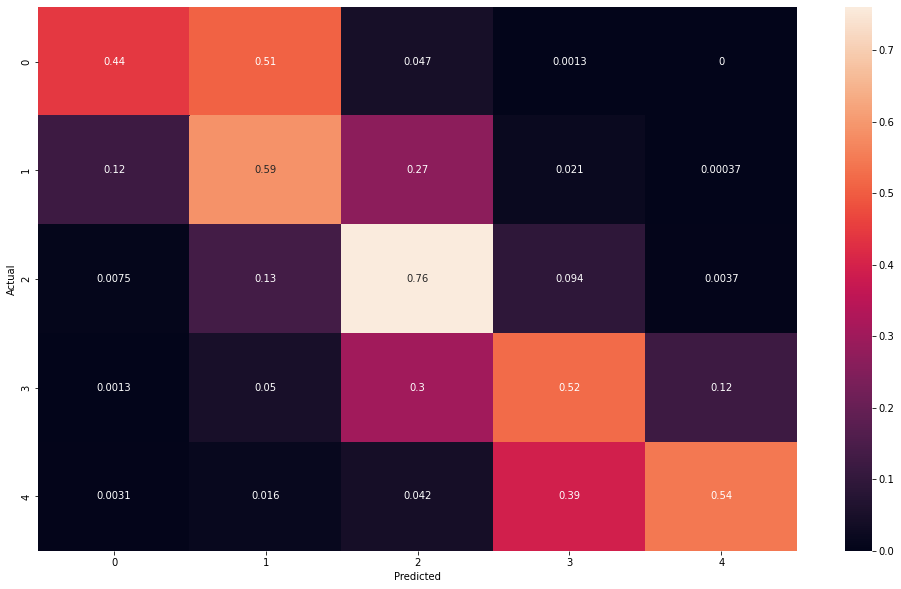

In [ ]:
#Confusion matrix:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import os
import numpy as np

y_pred = []
y_actual = []

# iterate over test data
for inputs, labels in test_loader:
  inputs, labels = inputs.to(dev), labels.to(dev)
  output = model1(inputs) # Feed Network
  output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
  y_pred.extend(output) # Save Prediction
  
  labels = labels.data.cpu().numpy()
  y_actual.extend(labels) # Save Truth

# constant for classes
classes = ['0', '1', '2', '3', '4']

# Build confusion matrix
cm = confusion_matrix(y_actual, y_pred)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(17,10))
sns.heatmap(cmn, annot=True, xticklabels=classes, yticklabels=classes)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False) 

## TEST 

In [ ]:
# Test phrase
phrase = "nice movie but nothing special"
phrase = [vocab[w] for w in phrase.split(" ")] 
phrase = [0]*(seq_len - len(phrase)) + phrase
phrase = torch.LongTensor(phrase).unsqueeze(0).to(dev)
# Process review
model1.eval()
output = model1(phrase).cpu()
probabilities = F.softmax(output,1)
_,pred = output.max(1)
pred = pred[0]
print(("somewhat negative" if pred == 1 else "negative" if pred == 0 else "neutral" if pred == 2 else "somewhat positive" if pred == 3 else "positive") + f" ({100*probabilities[0,pred]:.1f}%)")


neutral (54.4%)
